In [1]:
import gdown
gdown.download('https://bit.ly/3736JW1', 'ns_book6.csv', quiet=False)

Downloading...
From: https://bit.ly/3736JW1
To: C:\Users\user\kepco\ns_book6.csv
100%|█████████████████████████████████████████████████████████████████████████████| 55.0M/55.0M [00:06<00:00, 8.66MB/s]


'ns_book6.csv'

In [2]:
import pandas as pd
ns_book6 = pd.read_csv('ns_book6.csv', low_memory=False)
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
#판다스의 데이터프레임에서 기본적인 기술통계 몇가지를 자동으로 추출해주는 describe()메서드
ns_book6.describe()

,번호,발행년도,도서권수,대출건수
count,379976.000000,379976.000000,379976.000000,379976.000000
mean,201726.332847,2008.516306,1.135874,11.504629
std,115836.454596,8.780529,0.483343,19.241926
min,1.000000,1947.000000,0.000000,0.000000
25%,102202.750000,2003.000000,1.000000,2.000000
50%,203179.500000,2009.000000,1.000000,6.000000
75%,301630.250000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [4]:
sum(ns_book6['도서권수']==0)

3206

In [5]:
ns_book7 = ns_book6[ns_book6['도서권수']>0]

In [6]:
ns_book7.describe(percentiles=[0.3,0.6,0.9])

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
30%,124649.700000,2004.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
60%,243537.400000,2011.000000,1.000000,8.000000
90%,361341.100000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [7]:
#describe매서드에서 열의 데이터 타입이 수치가 아닌 다른 데이터 타입의 열의 기술통계를 보고 싶으면
#include매개변수에 데이터 타입을 지정하여 볼 수 있음
ns_book7.describe(include='object')

,도서명,저자,출판사,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자
count,376770,376770,376770,376770,55866,308252,61793,359792,376770
unique,336408,248850,21875,350810,14875,17,834,12467,4562
top,승정원일기,세종대왕기념사업회 [편],문학동네,9788937430299,9788937460005,0,1,813.6,1970-01-01
freq,250,303,4410,206,702,158235,13282,14816,28185


In [8]:
#mean()
#판다스 데이터프레임과 시리즈 객체는 평균을 계산하는 mean()메서드를 제공
ns_book7['대출건수'].mean()

11.593438968070707

In [9]:
#중앙값
#median()
ns_book7['대출건수'].median()

6.0

In [10]:
temp_df = pd.DataFrame([1, 2, 3, 4])
temp_df.median()

0    2.5
dtype: float64

In [11]:
#중복값 제거하고 중앙값 구하기
#drop_duplicates()로 중복된 값을 가진 행을 제거한 후 중앙값 구하기
ns_book7['대출건수'].drop_duplicates().median()

183.0

In [12]:
#최솟값/최댓값
print(ns_book7['대출건수'].min())
print(ns_book7['대출건수'].max())


0
1765


In [13]:
#분위수 구하기
#데이터를 순서대로 늘어 놓았을 때 이를 균등한 가격으로 나누는 기준점
#quantile()
ns_book7['대출건수'].quantile(0.25) #하위 25%

2.0

In [15]:
#대출건수 10이 위치한 백분위 찾기
borrow_10_flag = ns_book7['대출건수'] < 10 #불리언배열 생성
borrow_10_flag.mean() #0.6402712530190833 #10보다 작은 값이 차지하는 비율
ns_book7['대출건수'].quantile(0.65)

10.0

In [16]:
#분산 구하기
#평균으로부터 데이터가 얼마나 퍼져 있는지를 나타내는 통계량
#데이터가 가운데에 모여 있다면 분산이 작고 넓게 퍼져 있다면 분산이 크다.
#데이터의 각 값에서 평균을 뺀 다음 제곱한 후 평균처럼 샘플 개수로 나누어 구할 수 있다.

In [17]:
#var()메서드
#판다스의 분산을 계산하는 메서드
ns_book7['대출건수'].var()
#분산은 제곱을 했기 때문에 데이터가 평균에서 멀어질수록 값이 급격히 커진다.
#단위가 대출건수의 제곱이 되어 해석하기 어렵다.
#이를 보완하기 위해 분산에 제곱근을 취한 표준편차를 사용
#그냥 제곱한거에 루트 씌워준다는 뜻

371.6956304306922

In [18]:
#std() 메서드
ns_book7['대출건수'].std()
#평균을 구했을 때 11회가 조금 넘는것을 알 수 있었고
#이는 평균보다 19만큼 더 많거나 적을 수 있다는 의미
#계산을 해보면 대출건수가 음수다? 이거는 이상하다.
#평균보다 훨씬 큰 대출건수가 있기 떄문에 표준편차가 큰것으로 예상.

19.27940949382766

In [19]:
#최빈값 구하기
#데이터에서 가장 많이 등장하는 값
#ns_book7.describe(include='object')에서 나온 top값이 최빈값
#판다스에서 mode()메서드는 최빈값을 계산
ns_book7['도서명'].mode()

0    승정원일기
Name: 도서명, dtype: object

In [20]:
ns_book7['발행년도'].mode()

0    2012.0
Name: 발행년도, dtype: float64

In [21]:
#평균, 중앙값, 최솟값, 최댓값, 분위수, 분산, 표준편차
#위의 판다스 메서드들은 데이터프레임에도 사용 가능
#수치형 열만 연산할 수 있기 때문에 해당 열에만 적용되도록 numeric_only매개변수를 True로 지정
#ns_book7에서 numeric_only매개변수를 지정하지 않으면 수치형 4개의 열을 포함한 모든 데이터 타입의 열에 대해
#수행하기 때문에 시간이 매우 오래 걸리며 경고가 발생
ns_book7.mean(numeric_only=True)

번호      202977.476649
발행년도      2008.460076
도서권수         1.145540
대출건수        11.593439
dtype: float64

In [22]:
ns_book7.loc[:, '도서명':].mode()

,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,승정원일기,세종대왕기념사업회 [편],문학동네,2012.0,9788937430299,9788937460005,0,1,813.6,1,0,1970-01-01


In [23]:
ns_book7.to_csv('ns_book7.csv', index=False)

In [4]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\Users\user\kepco\ns_book7.csv
100%|█████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:07<00:00, 7.24MB/s]


'ns_book7.csv'

In [30]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [31]:
import matplotlib.pyplot as plt

In [32]:
#산점도

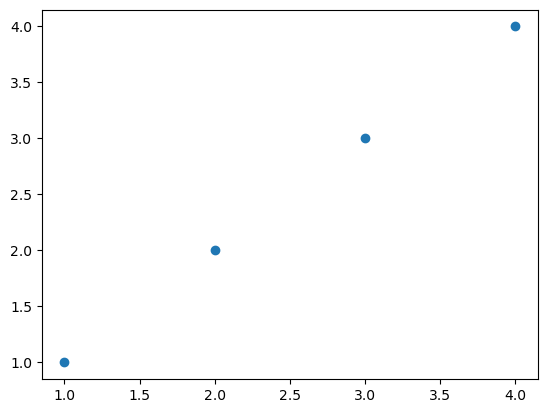

In [33]:
plt.scatter([1,2,3,4],[1,2,3,4])

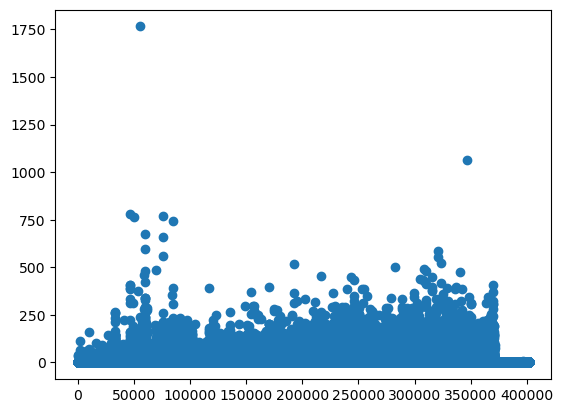

In [34]:
plt.scatter(ns_book7['번호'],ns_book7['대출건수'])
plt.show()

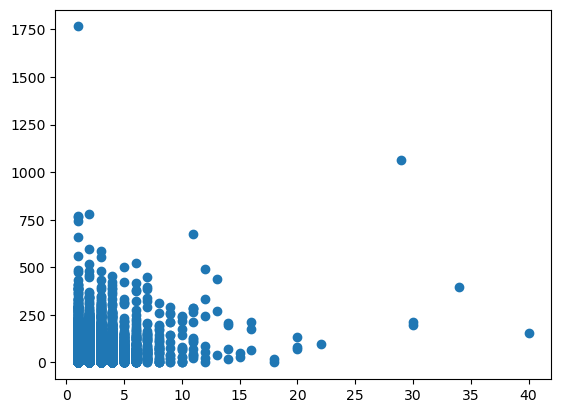

In [35]:
plt.scatter(ns_book7['도서권수'],ns_book7['대출건수'])
plt.show() 

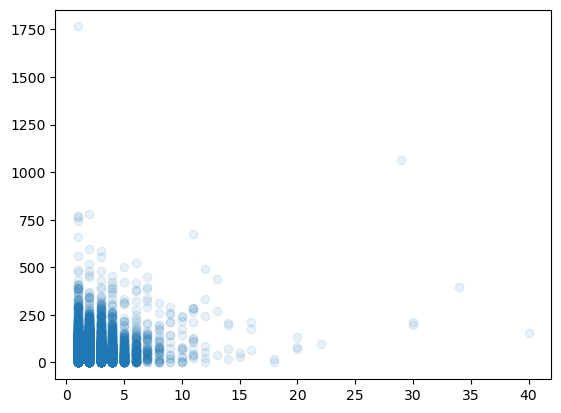

In [36]:
plt.scatter(ns_book7['도서권수'],ns_book7['대출건수'], alpha=0.1) #0에 가까울수록 투명 1에 가까울수록 불투명(투명도)
plt.show() 
#도서권수가 적음
#대부분 작은 값이기 때문에 도서권수와 대출건수 사이의 관계파악 어려움

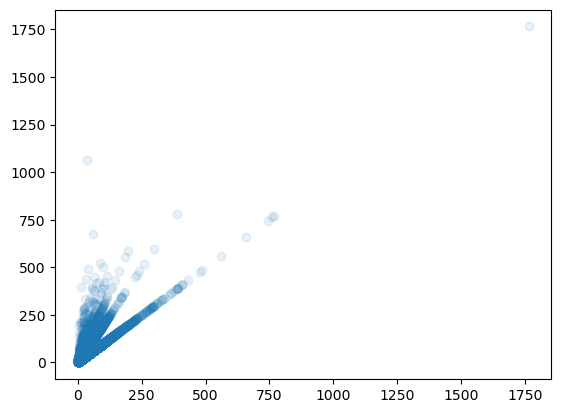

In [37]:
average_borrows = ns_book7['대출건수']/ns_book7['도서권수']
plt.scatter(average_borrows, ns_book7['대출건수'], alpha=0.1)
plt.show()
#양의 상관관계 그래프

In [38]:
#히스토그램
#수치형 특성의 값을 일정한 구간으로 나누어 구간 안에 포함된 데이터 개수를 막대 그래프로 그린 것
#구간 안에 속한 데이터 개수를 도수라고 부른다.

(array([1., 1., 1., 0., 2., 1., 1., 1.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  , 4.75, 5.5 , 6.25, 7.  ]),
 <BarContainer object of 8 artists>)

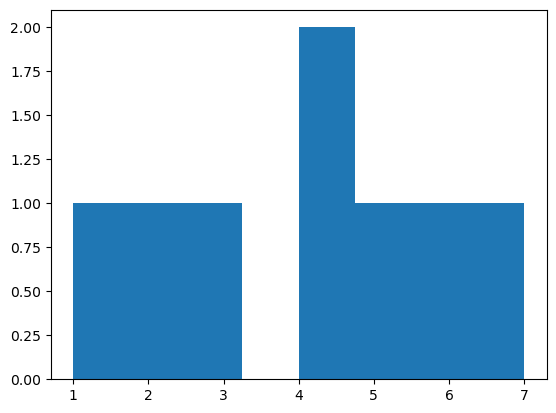

In [39]:
#hist()
#1차원 데이터를 입력받아 히스토그램을 그리며 기본적으로 데이터를 10개 구간으로 나눈다.
plt.hist([1, 2, 4, 5, 6, 7, 3, 4], bins=8) #bins를 8로 지정해줌으로써 8개의 구간으로 나눔

In [40]:
#histogram_bin_edges()를 통해 나눈 구간을 정확히 파악
import numpy as np
np.histogram_bin_edges([1, 2, 4, 5, 6, 7, 3, 4], bins=8)

array([1.  , 1.75, 2.5 , 3.25, 4.  , 4.75, 5.5 , 6.25, 7.  ])

In [41]:
#난수 생성
random_samples = np.random.randn(1000) #랜덤실수 생성 / seed()를 사용하면 유사난수 생성(가짜난수)

In [42]:
#평균 / 표준편차
print(np.mean(random_samples), np.std(random_samples))
#평균이 0 표준편차가 1에 가까울수록 표준정규분포를 따른다.
#(종 모양처럼 가운데가 볼록하고 평균을 중심으로 대칭인 분포를 정규분포, 평균이 0이고 표준편차가 1인 정규분포를 표준정규분포라고 한다.

-0.0019317732035875927 1.0155422862831496


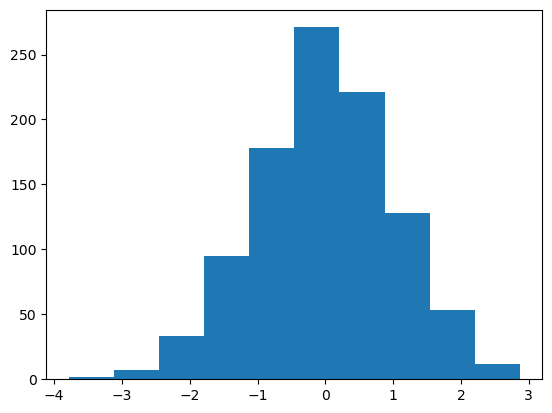

In [43]:
plt.hist(random_samples)
plt.show()

In [44]:
ns_book7.describe(percentiles=[0.3, 0.6, 0.9])

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
30%,124649.700000,2004.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
60%,243537.400000,2011.000000,1.000000,8.000000
90%,361341.100000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


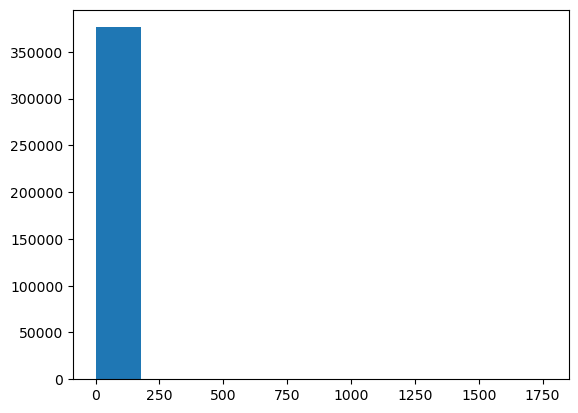

In [45]:
plt.hist(ns_book7['대출건수'])
plt.show()
#위의 describe()를 통해 '대출건수'열의 90%백분위에 해당하는 값은 28에 불과하다는것을 알 수 있다.
#첫번째 구간의 도수가 너무 커서 나머지 구간에는 도수 값이 표시되지 않는 현상이 발생한다. 이럴때 필요한 것이 구간조정

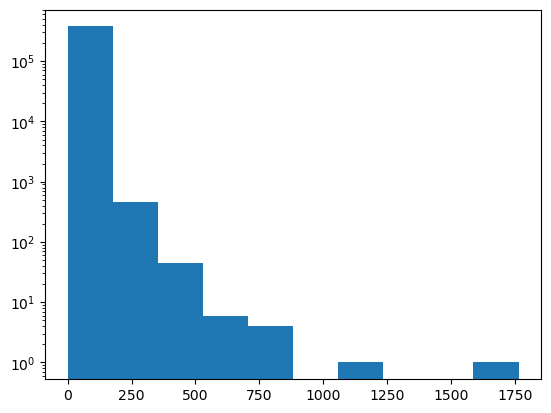

In [46]:
#구간조정은 로그 스케일을 통해 해결
#y축에 로그 함수를 적용한다는 의미
#yscale()함수에 log 지정
#x축에는 xscale()함수 적용 가능
plt.hist(ns_book7['대출건수'])
plt.yscale('log')
plt.show()

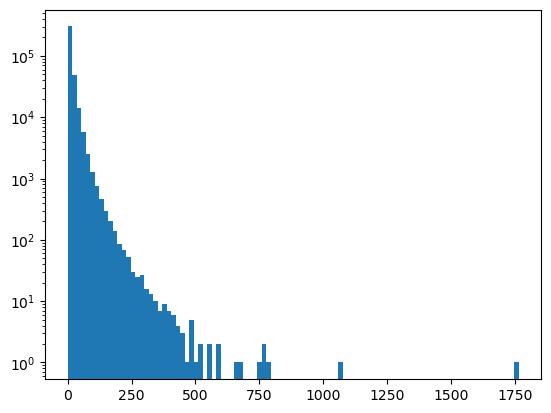

In [47]:
plt.hist(ns_book7['대출건수'], bins=100)
plt.yscale('log')
plt.show()

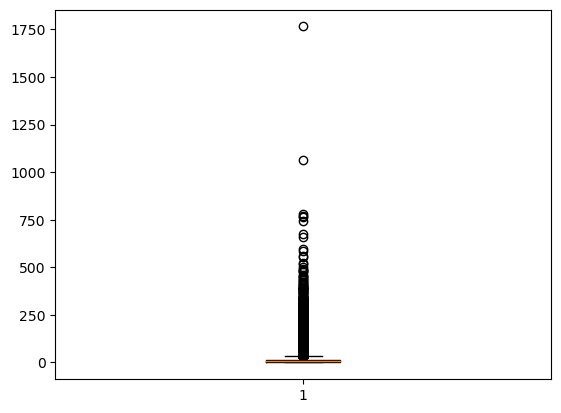

In [48]:
#상자수염그림
#최솟값, 세 개의 사분위수, 최댓값 총 5개의 숫자를 사용해 데이터를 요약하는 그래프
#boxplot()
#한개 이상의 데이터프레임 열을 전달하여 그래프를 그림
plt.boxplot(ns_book7['대출건수'])
plt.show()

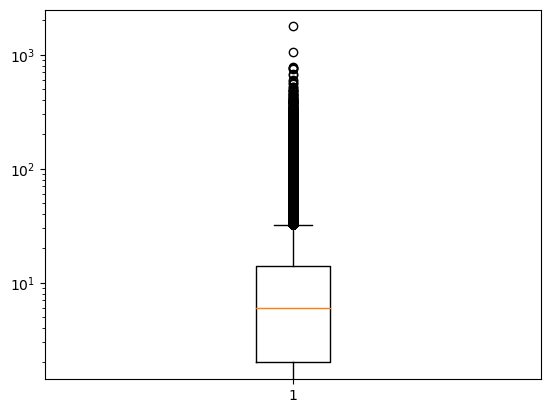

In [49]:
plt.boxplot(ns_book7['대출건수'])
plt.yscale('log')
plt.show()

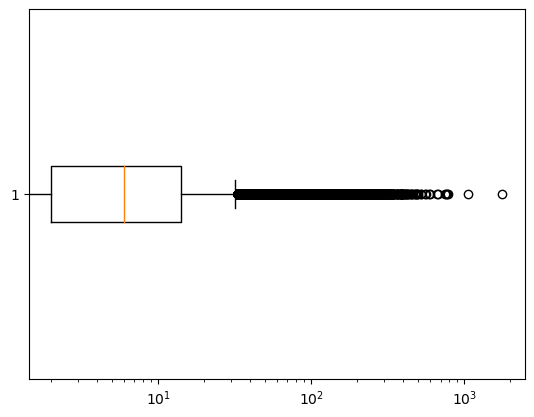

In [50]:
#상자수염그림을 수평으로 그려야 할때는 vert 매개변수를 기본값 Ture에서 False로 변경
#수평이기 때문에 xscale()로 변경해야 함
plt.boxplot(ns_book7['대출건수'], vert=False)
plt.xscale('log')
plt.show()

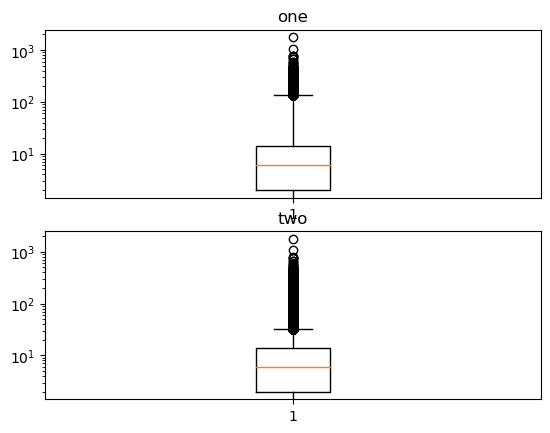

In [51]:
#수염길이조절
#기본적으로 수염의 길이는 IQR의 1.5배
#boxplot()함수의 whis 매개변수를 통해 조정가능
plt.subplot(2, 1, 1)
plt.boxplot(ns_book7['대출건수'], whis=10)
plt.yscale('log')
plt.title('one')

plt.subplot(2, 1, 2)
plt.boxplot(ns_book7['대출건수'])
plt.yscale('log')
plt.title('two')
plt.show()


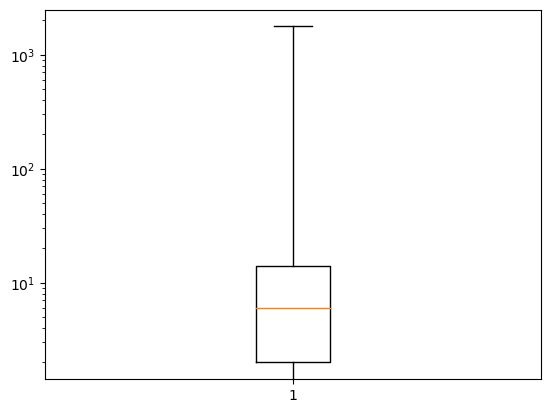

In [52]:
#백분율로도 지정 가능
plt.boxplot(ns_book7['대출건수'], whis=(0,100))
plt.yscale('log')
plt.show()

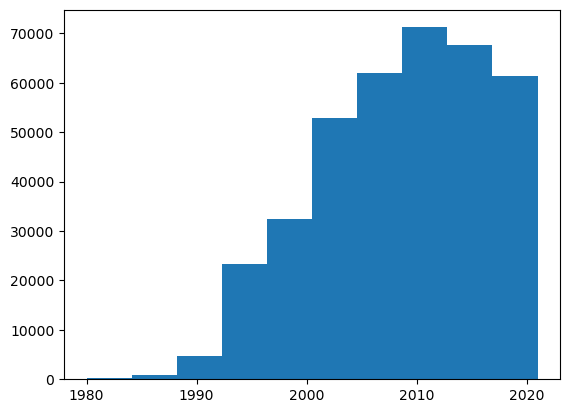

In [53]:
selected_rows = ns_book7.loc[(ns_book7['발행년도'] >= 1980) & (ns_book7['발행년도'] <= 2022) , :]
plt.hist(selected_rows['발행년도'])
plt.show()

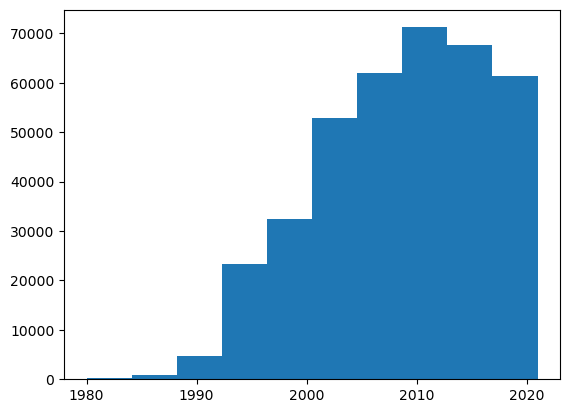

In [54]:
selected_rows = (ns_book7['발행년도'] >= 1980) & (ns_book7['발행년도'] <= 2022)
plt.hist(ns_book7.loc[selected_rows, '발행년도'])
plt.show()